In [1]:
import pandas as pd
# load the dataset
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()
# resample to hourly frequency
df_hour = df.resample('1H').mean()
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month
# drop missing data
df_hour = df_hour.dropna()
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

In [2]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=df_train, target = 'electricity_usage', session_id=666)

,Description,Value
0,session_id,666
1,Target,electricity_usage
2,Original Data,"(34743, 10)"
3,Missing Values,0
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(24320, 20)"


In [3]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4159,0.3645,0.6036,0.5357,0.2523,0.5605,0.4530
catboost,CatBoost Regressor,0.4158,0.3656,0.6045,0.5343,0.2526,0.5545,4.9140
gbr,Gradient Boosting Regressor,0.4202,0.3675,0.6061,0.5318,0.2540,0.5726,2.8250
rf,Random Forest Regressor,0.4232,0.3745,0.6118,0.5229,0.2571,0.5804,7.1610
xgboost,Extreme Gradient Boosting,0.4262,0.3837,0.6193,0.5112,0.2589,0.5683,3.6300
et,Extra Trees Regressor,0.4287,0.3846,0.6200,0.5101,0.2600,0.5852,3.3140
lr,Linear Regression,0.4420,0.3848,0.6202,0.5096,0.2612,0.6342,1.2680
ridge,Ridge Regression,0.4420,0.3848,0.6202,0.5096,0.2612,0.6342,0.0210
br,Bayesian Ridge,0.4421,0.3848,0.6202,0.5096,0.2612,0.6345,0.0300
lar,Least Angle Regression,0.4421,0.3850,0.6204,0.5094,0.2612,0.6342,0.0230


In [4]:
print(pycaret_models)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=666, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [5]:
from sklearn.metrics import mean_squared_error

predictions = predict_model(pycaret_models, data=df_test)
mean_squared_error(predictions['electricity_usage'], predictions['Label'])

0.2978445058103306

<AxesSubplot:xlabel='date_time'>

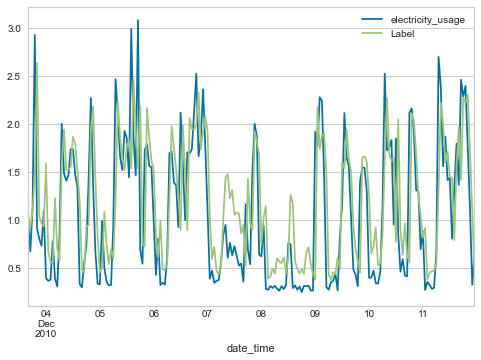

In [6]:
predictions[['electricity_usage', 'Label']].plot()